<a href="https://colab.research.google.com/github/ashwin789/my-world/blob/master/ScratchModel/TomatoDataset%20/TomatoDataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First be ensure that, you are connected to GPU runtime.
If not then go through :

*   Runtime > change runtime type > Hardware accelerator  To GPU





In [1]:
# command to check the GPU version
! nvidia-smi

# In my case, I got Tesla T4 which is the best version right now

Fri Apr 23 16:36:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Then we will install Kaggle using following command

In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=b6abfcdfcf2fb695bbdf8ca167dad1267ca0698c7b63b184df1ae65350a704f4
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


We need to upload the kaggle.json file which contains the username and password of our kaggle account which is necessary for us to import the dataset

In [ ]:
from google.colab import files
files.upload()

Below are the 3 mandatory commands we need to execute. 

In [4]:
# create a kaggle folder
! mkdir ~/.kaggle


In [5]:
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/


In [6]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json


Now we are importing the tomato dataset from kaggle by simply **" ! symbol followed by the API command of that dataset"**

In [7]:
! kaggle datasets download -d noulam/tomato

 98% 731M/743M [00:04<00:00, 190MB/s]
100% 743M/743M [00:04<00:00, 180MB/s]


Now we are unzipping the zip file

In [ ]:
!unzip "/content/tomato.zip"

Now we are installing the required libraries

In [9]:
# TensorFlow and tf.keras
import tensorflow as tf


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import cv2
import os
print(tf.__version__)

2.4.1


Here is the **temp_img_path** value is according to my environment. so the path may get change in your system. so please make proper path correction if necessary

We have simply taken a path of any image from our train dataset

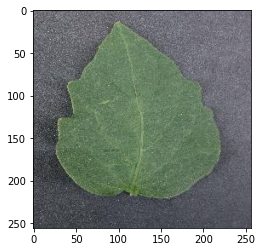

In [10]:
temp_img_path = "/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG"
img = image.load_img(temp_img_path)
plt.imshow(img)

Finding shape of image

In [11]:
cv2.imread(temp_img_path).shape

(256, 256, 3)

We are normalizing the images. And also we are providing the proper path of train and test images and storing it in train_dataset and test_dataset

In [12]:
train = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/New Plant Diseases Dataset(Augmented)/train")
test_dataset = train.flow_from_directory("/content/New Plant Diseases Dataset(Augmented)/valid")

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


Printing the class indices of both train and test datasets

In [13]:
train_dataset.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [14]:
test_dataset.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

Importing the required libraries and defining our model

In [15]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization

# (3) Create a sequential model
model = Sequential()  

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(256, 256,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())


# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 62, 62, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 21, 21, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0

Specifying the optimizer, loss funtion, metrics and compiling the model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model with 10 epochs

In [18]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
574/574 [==============================] - 78s 77ms/step - loss: 2.0921 - accuracy: 0.3617
Epoch 2/10
574/574 [==============================] - 43s 75ms/step - loss: 0.9376 - accuracy: 0.6821
Epoch 3/10
574/574 [==============================] - 43s 75ms/step - loss: 0.6003 - accuracy: 0.7892
Epoch 4/10
574/574 [==============================] - 43s 76ms/step - loss: 0.5111 - accuracy: 0.8248
Epoch 5/10
574/574 [==============================] - 44s 76ms/step - loss: 0.4290 - accuracy: 0.8481
Epoch 6/10
574/574 [==============================] - 44s 76ms/step - loss: 0.3803 - accuracy: 0.8686
Epoch 7/10
574/574 [==============================] - 43s 75ms/step - loss: 0.3533 - accuracy: 0.8757
Epoch 8/10
574/574 [==============================] - 44s 76ms/step - loss: 0.3023 - accuracy: 0.8979
Epoch 9/10
574/574 [==============================] - 43s 75ms/step - loss: 0.2926 - accuracy: 0.8992
Epoch 10/10
574/574 [==============================] - 44s 76ms/step - loss: 0.273

We are getting an accuracy of nearly 90% in only 10 epochs. The accuracy may get increased if we used more number of epochs to train the model.

Now we need to test our model on completly new dataset i.e. on test dataset. And we will observe the accuracy.

In [19]:
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print('\nTest accuracy:', test_acc)

144/144 - 9s - loss: 0.8893 - accuracy: 0.7616

Test accuracy: 0.7616139650344849


The accuracy on test dataset is nearly 76% which shows that we either need to improve our model or we need to deep train our model by increasing the train dataset and increasing the number of epochs while training.